In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#loading dataset
df = pd.read_csv("PlasmaSomalogic.csv")
df_new = pd.DataFrame(columns=list(df.columns))
X=df = df.iloc[: , 1:]
print(X.head(5))
print(X.shape)


    STUB1  CEBPB    ENO2  PIAS4  IL10RA  STAT3    IRF1   MCL1   OAS1    MYC  \
0  1084.0  396.2  7065.9  490.7   702.9  761.0  1003.2  443.4  140.7  190.6   
1   916.7  492.2  6341.9  518.6   691.7  922.3  1226.6  728.3  328.1  214.2   
2   744.4  541.4  8916.0  615.5   742.4  595.8  2336.8  614.6  162.3  197.5   
3   831.0  544.7  5317.6  504.9   837.8  944.0  1011.6  459.2  150.6  307.6   
4  1033.4  558.4  4022.1  548.6   742.9  891.4  1146.8  522.3  148.4  196.4   

   ...  UBE2G2  TAGLN2   ATP5O  POMC.2  CRYZL1  SERPINF1    CTSF    FTCD  \
0  ...  4804.4  2233.0  3610.9   715.8   151.4   37885.8  1479.1  3261.8   
1  ...  5023.5  2108.8  2679.9   363.0   191.8   32384.0  1557.6  1950.0   
2  ...  4261.9  1804.6  1470.6   526.8   163.0   38938.3  1170.1  1036.8   
3  ...  4017.6  2057.7  2331.3   439.6   178.1   34359.5  1427.1  3149.2   
4  ...  4489.4  2653.4  2189.1   655.9   176.3   35281.1  1944.2  3266.7   

   USP25  PLXNB2  
0  561.3  3227.0  
1  701.3  3179.1  
2  552.8  3

In [ ]:
df_feature=pd.read_csv("featureweeks.csv")
feature_weeks=[]
for feature in df_feature["x"]:
  feature_weeks.append(feature)

In [ ]:
len(feature_weeks)

68

In [ ]:
y=np.array(feature_weeks)
#X=np.array(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Train data shape of X = % s and Y = % s : "%(
	X_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	X_test.shape, y_test.shape))


Train data shape of X = (54, 1300) and Y = (54,) : 
Test data shape of X = (14, 1300) and Y = (14,) : 


In [ ]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = X_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)


Mean squared Error on test set :  2.0672424944403559e+24
       Columns  Coefficient Estimate
0        STUB1          2.514661e+07
1        CEBPB         -3.081267e+06
2         ENO2         -1.769175e+07
3        PIAS4         -1.903756e+07
4       IL10RA         -1.112536e+07
...        ...                   ...
1295  SERPINF1          9.312373e+06
1296      CTSF          1.056426e+06
1297      FTCD          8.408670e+06
1298     USP25         -4.825009e+05
1299    PLXNB2          4.288358e+05

[1300 rows x 2 columns]


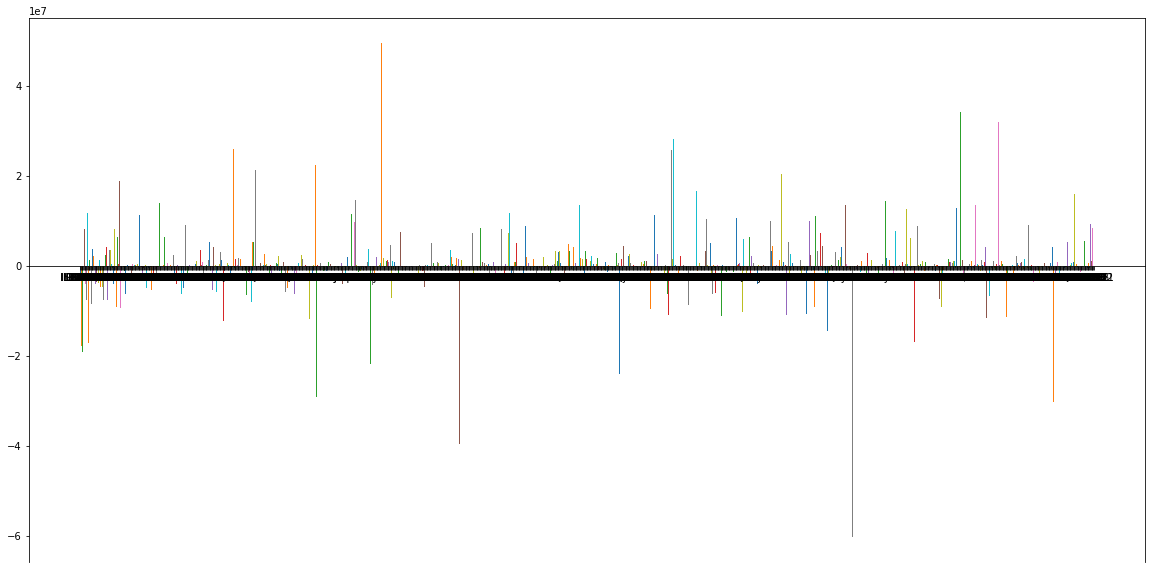

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficient["Columns"],
lreg_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


7.958239558389279
       Columns  Coefficient Estimate
0        STUB1         -9.129446e-07
1        CEBPB          1.407754e-06
2         ENO2         -4.118117e-05
3        PIAS4          9.509603e-07
4       IL10RA         -3.665608e-07
...        ...                   ...
1295  SERPINF1          1.712151e-06
1296      CTSF          1.332773e-06
1297      FTCD         -1.378091e-05
1298     USP25          3.167135e-07
1299    PLXNB2          5.299891e-06

[1300 rows x 2 columns]


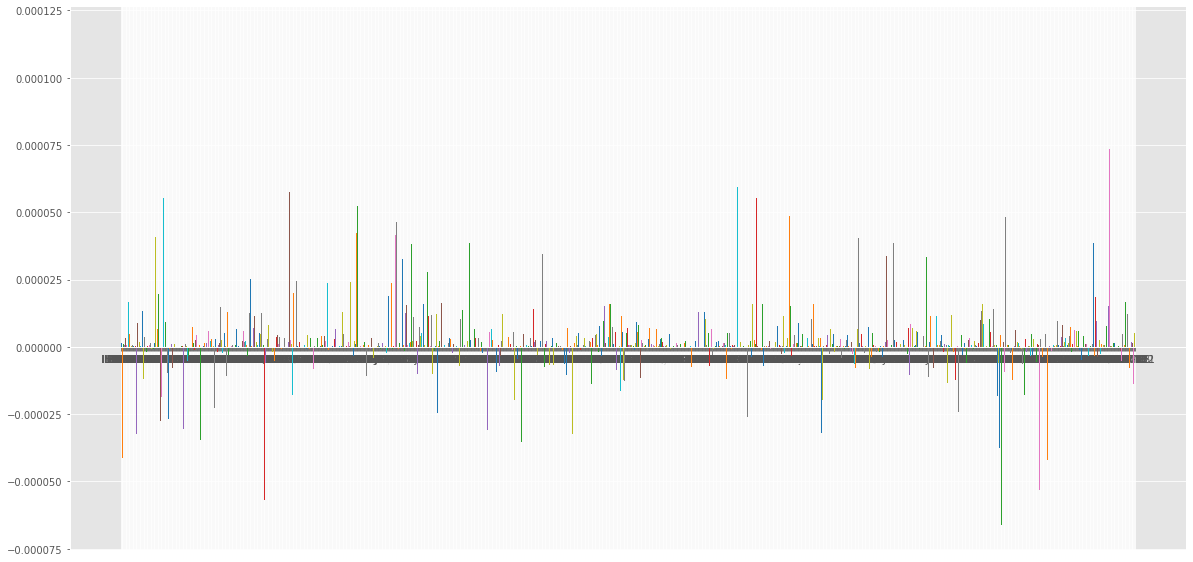

In [ ]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()


In [ ]:
# import model
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = 1)
e_net.fit(X_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = X_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff


Mean Squared Error on test set 24.047808832211405


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.350e+02, tolerance: 5.090e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,Columns,Coefficient Estimate
0,STUB1,-0.010671
1,CEBPB,0.000000
2,ENO2,-0.000449
3,PIAS4,0.000372
4,IL10RA,0.000000
...,...,...
1295,SERPINF1,0.000037
1296,CTSF,-0.000000
1297,FTCD,0.000005
1298,USP25,0.000000
